In [1]:
import pandas as pd

directory = 'Ver6_1_2-4_0.2-0.3_0.4-0.6'

data = pd.read_csv('../../evaluation/' + directory + '/result.csv', header=None)
K = data[0][:]
N = len(K)
Ver = ['' for _ in range(N)]
Met = [[0 for _ in range(N)] for _ in range(3)]

for i in range(N):
    Ver[i] = K[i]
    Met[0][i] = data[1][i]
    Met[1][i] = data[2][i]
    Met[2][i] = data[3][i]

data = pd.read_csv('../../time/' + directory + '/time.csv', header=None)
time = {}
Time = [[0 for _ in range(N)] for _ in range(5)]

for i in range(len(data[0])):
    time[data[0][i]] = [data[1][i], data[2][i], data[3][i], data[4][i], data[5][i]]
    
for i, j in enumerate(Ver):
    for k in range(5):
        Time[k][i] = time[j][k]
    print(j + ': ' + str(time[j]))

Ver6_2_0.2_0.4: [43.62683485050008, 107.86566167774764, 1.5674628833732531, 188.5813203188453, 0.0041829477442373]
Ver6_2_0.2_0.5: [43.31532799371394, 110.48174848650936, 1.4154155655662155, 201.58456575752484, 0.0041947506441928]
Ver6_2_0.2_0.6: [39.5768562165817, 98.83884864278356, 1.3349127061295694, 175.84535154965843, 0.0040247888848333]
Ver6_2_0.25_0.4: [108.60667606391526, 103.38480401747292, 1.324988827846968, 181.0344681881442, 0.0042301593440594]
Ver6_2_0.25_0.5: [37.91314540523109, 114.05743938861504, 1.3519442907653902, 191.66278839111328, 0.0043387460236502]
Ver6_2_0.25_0.6: [41.72821800307468, 110.50459890082328, 1.3883090255283586, 178.15964056713744, 0.004289173843837]
Ver6_2_0.3_0.4: [39.53287861134742, 104.03358346164812, 1.3856439307183963, 178.91749533096163, 0.0040106254048866]
Ver6_2_0.3_0.5: [40.63868758702038, 109.84329421921528, 1.4883551267113524, 188.59854547104032, 0.0041522602043529]
Ver6_2_0.3_0.6: [43.39728969158508, 111.76120880806796, 1.3844612801428615

In [2]:
data = pd.read_csv('../../evaluation/Ver5_ORG/result.csv', header=None)
for i in [0]:
    Ver.insert(0, data[0][i])
    for j in range(3):
        Met[j].insert(0, data[j+1][i])

data = pd.read_csv('../../time/Ver5_ORG/time.csv', header=None)
for i in range(len(data[0])):
    time[data[0][i]] = [data[1][i], data[2][i], data[3][i], data[4][i], data[5][i]]

for i in [0]:
    j = Ver[i]
    for k in range(5):
        Time[k].insert(0, time[j][k])

In [3]:
data = pd.read_csv('../../evaluation/Ver4_ORG/result.csv', header=None)
for i in [0]:
    Ver.insert(0, data[0][i])
    for j in range(3):
        Met[j].insert(0, data[j+1][i])

data = pd.read_csv('../../time/Ver4_ORG/time.csv', header=None)
for i in range(len(data[0])):
    time[data[0][i]] = [data[1][i], data[2][i], data[3][i], data[4][i], data[5][i]]

for i in [0]:
    j = Ver[i]
    for k in range(5):
        Time[k].insert(0, time[j][k])

In [4]:
if not directory == 'Ver3_1_2-4_0-0.2_0-1':
    data = pd.read_csv('../../evaluation/Ver3_1_2-4_0-0.2_0-1/result.csv', header=None)
    for i in [9, 1, 0]:
        Ver.insert(0, data[0][i])
        for j in range(3):
            Met[j].insert(0, data[j+1][i])

    data = pd.read_csv('../../time/Ver3_1_2-4_0-0.2_0-1/time.csv', header=None)
    for i in range(len(data[0])):
        time[data[0][i]] = [data[1][i], data[2][i], data[3][i], data[4][i], data[5][i]]

    for i in range(2, -1, -1):
        j = Ver[i]
        for k in range(5):
            Time[k].insert(0, time[j][k])

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

def plot_result(Ver, Met, Time, ext, Name=''):
    N = len(ext)
    Met, Time = np.array(Met), np.array(Time)
    Ver, Met, Time = [Ver[i] for i in ext], Met[:,ext], Time[:,ext]
    idx = np.arange(N) * 4
    bar_width = 0.8
    Bot = [[0 for _ in range(N)] for _ in range(5)]
    for i in range(4):
        for j in range(N):
            if i == 0:
                Bot[i + 1][j] = Time[i][j]
            else:
                Bot[i + 1][j] = Bot[i][j] + Time[i][j]
    fig, ax1 = plt.subplots(figsize=(15, 10))
    plt.grid(True)
    fig.set_facecolor('white')
    b1 = plt.bar(idx, Met[0], bar_width, label='HMean', color='black', zorder=10)
    b2 = plt.bar(idx + bar_width, Met[1], bar_width, label='Precision', color='red', zorder=10)
    b3 = plt.bar(idx + 2*bar_width, Met[2], bar_width, label='Recall', color='blue', zorder=10)
    plt.xticks(idx + 3/2*bar_width, Ver, rotation=-45)
    plt.ylabel('[%]')
    plt.ylim([97, 98])
    ax2 = ax1.twinx()
    b4 = ax2.bar(idx + 3*bar_width, Time[0], label='Data handling\n(Mask, GPU to CPU)', color='silver')
    b5 = ax2.bar(idx + 3*bar_width, Time[1], bottom=Bot[1], label='PA (Pixel Aggregation)', color='indigo')
    b6 = ax2.bar(idx + 3*bar_width, Time[2], bottom=Bot[2], label='Resizing', color='magenta')
    b7 = ax2.bar(idx + 3*bar_width, Time[3], bottom=Bot[3], label='Boxgen', color='olive')
    b8 = ax2.bar(idx + 3*bar_width, Time[4], bottom=Bot[4], label='Data handling (Output)', color='cyan')
    plt.ylim([0, 1500])
    plt.ylabel('Time [ms]')
    bs = [b1, b2, b3, b4, b5, b6, b7, b8]
    labels = [b.get_label() for b in bs]
    plt.legend(bs, labels, loc='upper right', bbox_to_anchor=(1.41, 1.02))
    if Name != '':
        plt.savefig(Name + '.png', dpi=300, bbox_inches='tight', pad_inches=0.3, transparent=False)

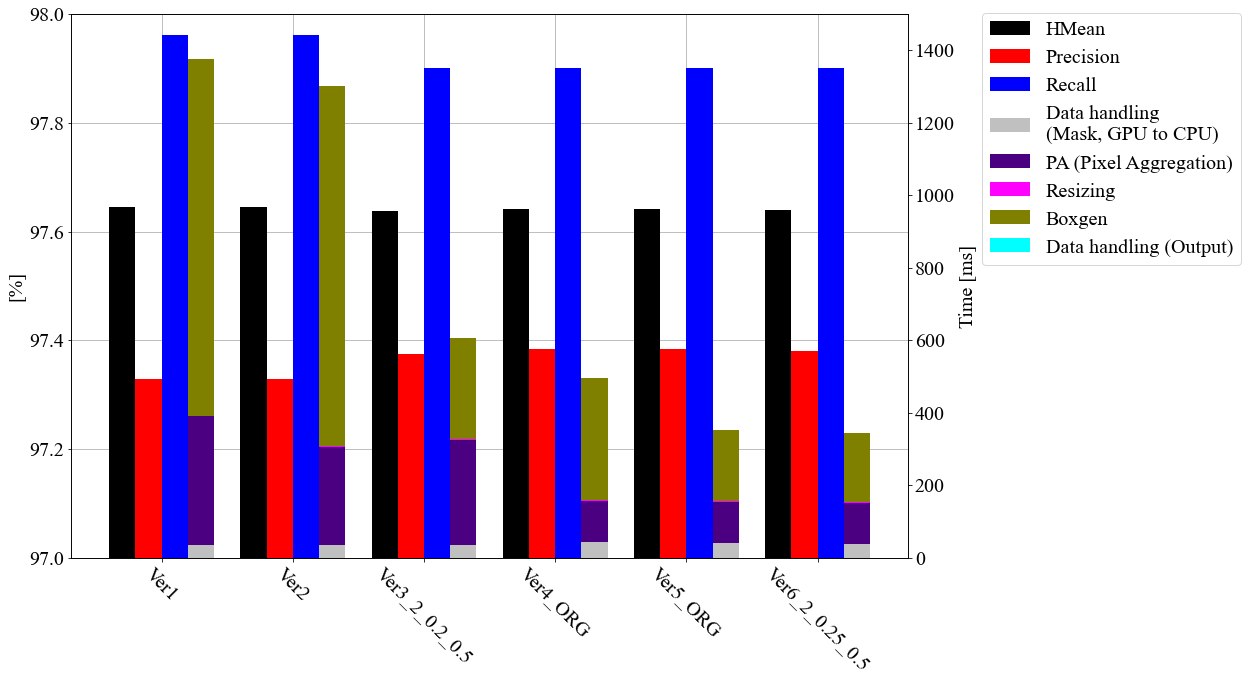

In [6]:
plot_result(Ver, Met, Time, [0, 1, 2, 3, 4, 9], 'Ver6_Base')

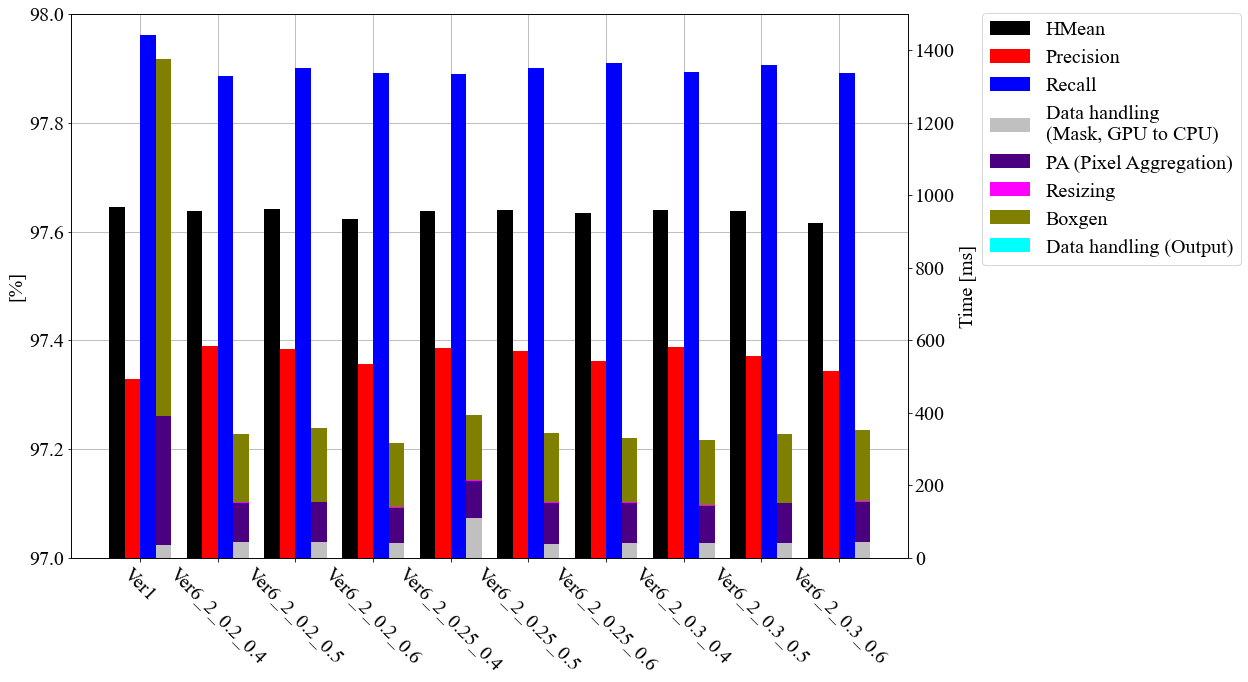

In [7]:
plot_result(Ver, Met, Time, [0, 5, 6, 7, 8, 9, 10, 11, 12, 13], 'Ver6_2')

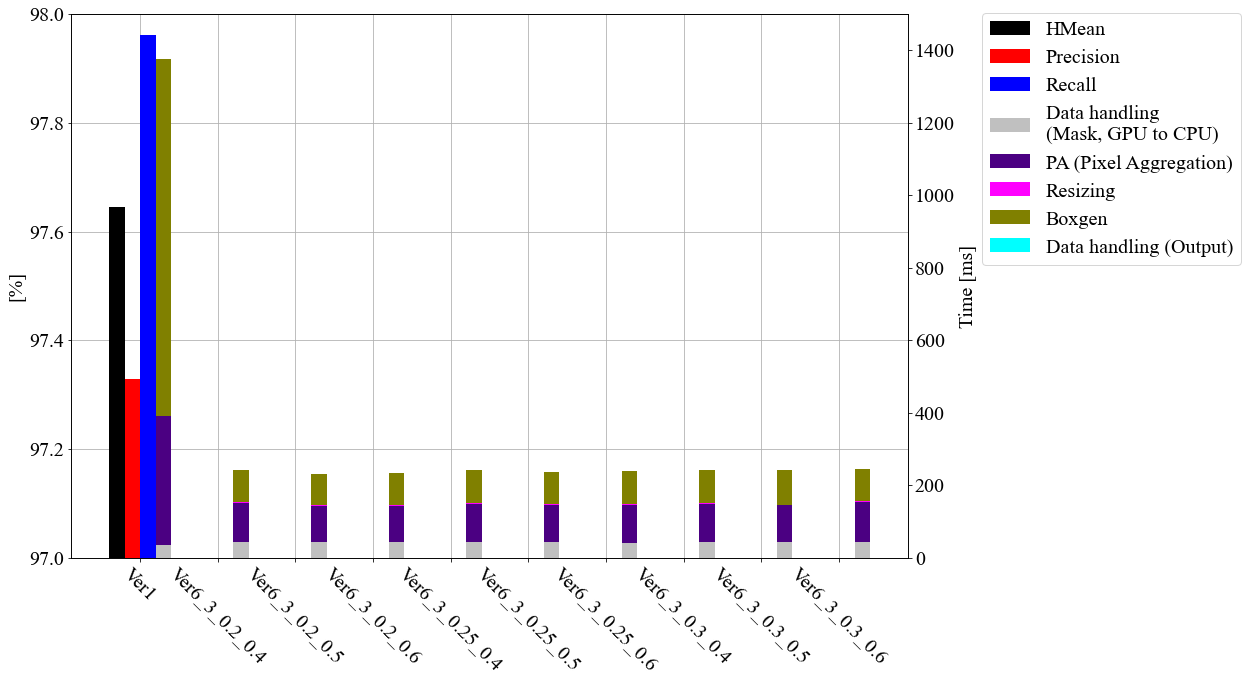

In [8]:
plot_result(Ver, Met, Time, [0, 14, 15, 16, 17, 18, 19, 20, 21, 22], 'Ver6_3')

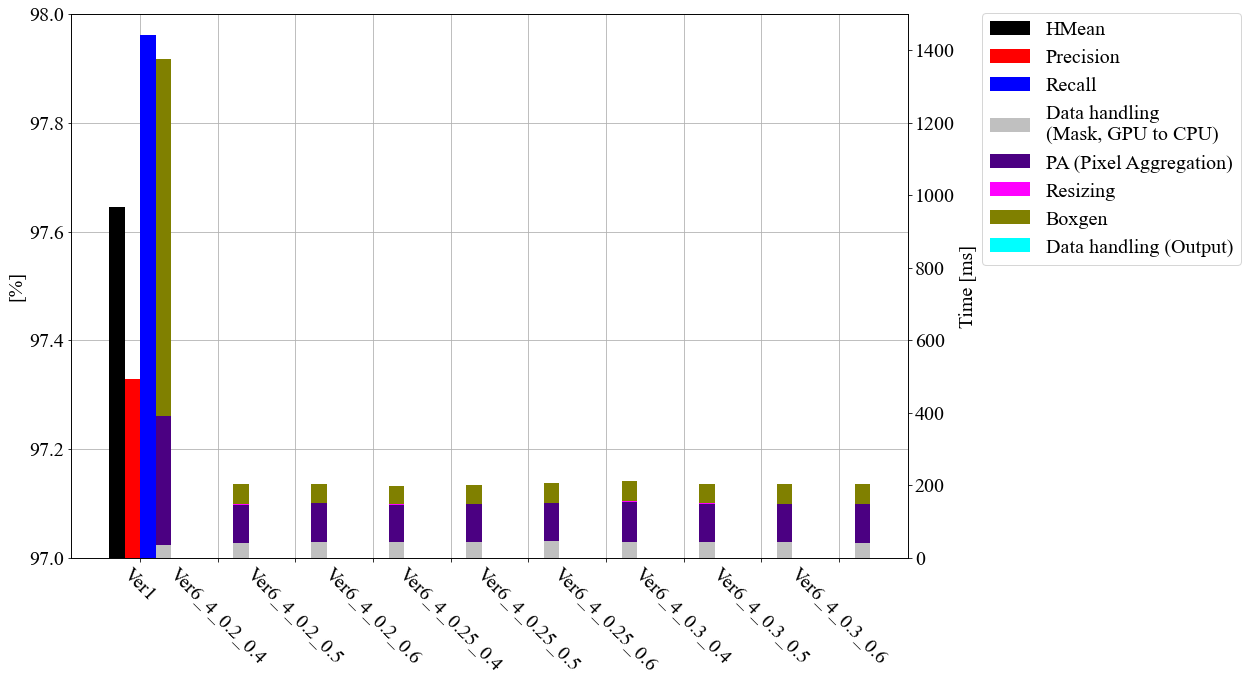

In [9]:
plot_result(Ver, Met, Time, [0, 23, 24, 25, 26, 27, 28, 29, 30, 31], 'Ver6_4')

In [10]:
def ra(idx, X, xlb=''):
    '''
    X = [[idx0, idx1, idx2], [idx3, idx4, idx5], [idx6, idx7, idx8]]
    '''
    res = [[], [], []]
    fig = plt.figure(figsize=(15, 10))
    for i1, i2, i3 in X:
        for j in range(3):
            res[j].append(np.array([Met[j][i1], Met[j][i2], Met[j][i3]]).mean())
    plt.grid()
    fig.set_facecolor('white')
    plt.plot(idx, res[0], 'black', linewidth=3, marker='s', markersize=15, label='HMean')
    plt.plot(idx, res[1], 'r--', linewidth=3, marker='v', markersize=15, label='Precision')
    plt.plot(idx, res[2], 'b-.', linewidth=3, marker='^', markersize=15, label='Recall')
    print(res)
    plt.xticks(idx)
    plt.legend(loc='upper right', bbox_to_anchor=(1.21, 1.02))
    plt.xlabel(xlb)
    plt.ylabel('[%]')
    plt.ylim([97.2, 98])
    if xlb != '':
        plt.savefig(xlb + '.png', dpi=300, bbox_inches='tight', pad_inches=0.3, transparent=False)

[[97.63457858267888, 97.63706169945014, 97.63156708908565], [97.37702523221333, 97.37580746311062, 97.36727160288865], [97.89349930843707, 97.8997233748271, 97.89730290456431]]


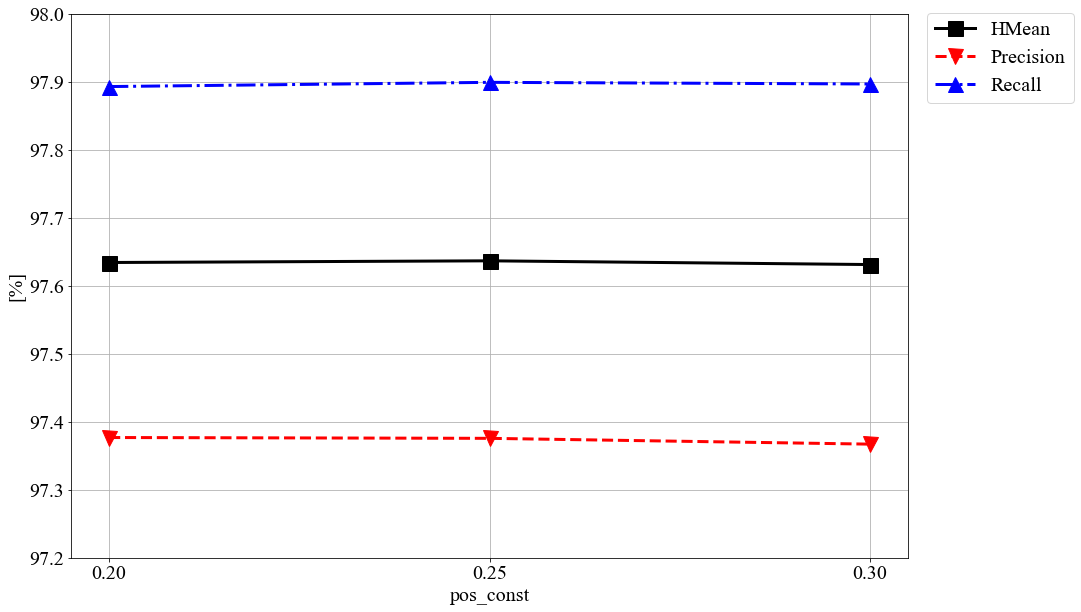

In [11]:
ra([0.2, 0.25, 0.3], [[5, 6, 7], [8, 9, 10], [11, 12, 13]], 'pos_const')

[[97.63841124192152, 97.639835635794, 97.62496049349916], [97.38807141386364, 97.37858745537847, 97.35344542897052], [97.89004149377593, 97.90248962655602, 97.89799446749656]]


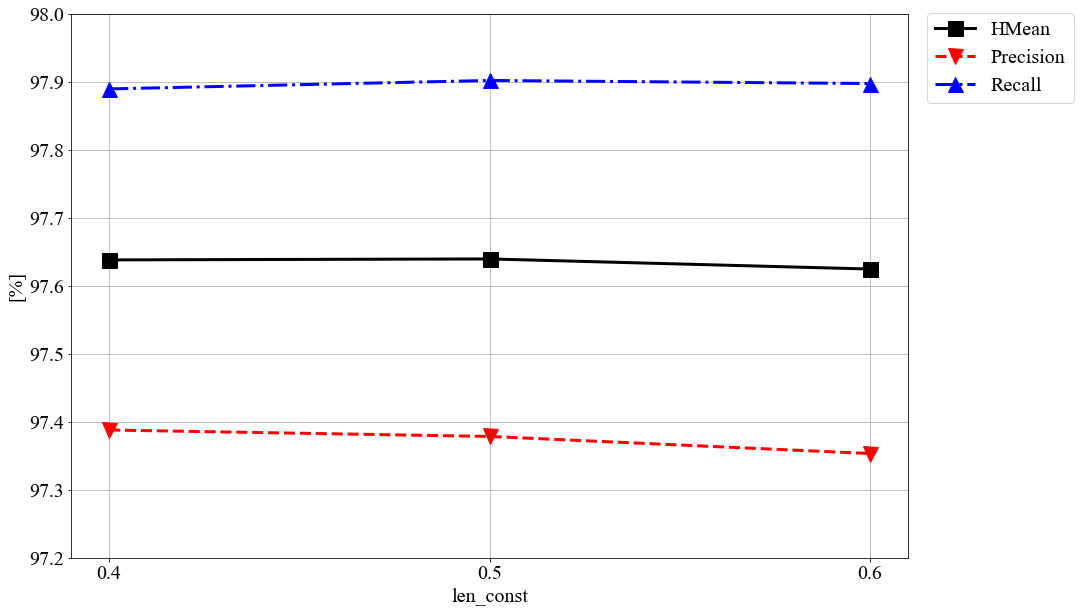

In [12]:
ra([0.4, 0.5, 0.6], [[5, 8, 11], [6, 9, 12], [7, 10, 13]], 'len_const')